# Project 5- Data Analysis of London Housing Price

In [42]:
# ready python code on watson studio to load any data file in dataframe
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_89964c8d3f9f498cba0461a952edae93 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FiDOa7PobmyuC_jhqU2zWgBMIP9jrskGpyRbERg45_aL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_89964c8d3f9f498cba0461a952edae93.get_object(Bucket='dataanalyticsprojects-donotdelete-pr-dfxqqqpn3k5k03',Key='5. London Housing Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [2]:
df.shape

(13549, 6)

In [4]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes'], dtype='object')

In [6]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [7]:
df.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

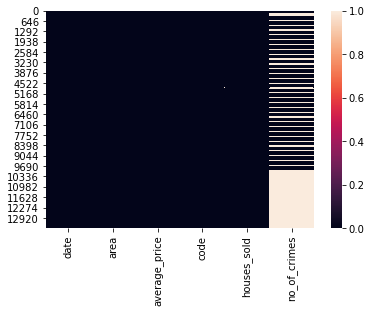

In [21]:
sns.heatmap(df.isnull())
plt.show()

### 1) Convert the Datatype of 'Date' column to Date-Time format.


In [47]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


In [48]:
df.date=pd.to_datetime(df.date)

In [49]:
df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

### 2) Add a new column ''year'' in the dataframe, which contains years only.

In [50]:
df['Year']=df.date.dt.year

### B.2 Add a new column ''month'' as 2nd column in the dataframe, which contains month only.


In [51]:
# To insert column at particular position
df.insert(2,'Month',df.date.dt.month)

In [52]:
df

,date,area,Month,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,city of london,1,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,2,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,3,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,4,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,5,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,9,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,england,10,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,england,11,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,england,12,250410,E92000001,NaN,NaN,2019


### 3) Remove the columns 'year' and 'month' from the dataframe.


In [36]:
df.drop(['Year','Month'],axis=1,inplace=True)

In [37]:
df

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN
13545,2019-10-01,england,249376,E92000001,68677.0,NaN
13546,2019-11-01,england,248515,E92000001,67814.0,NaN
13547,2019-12-01,england,250410,E92000001,NaN,NaN


### 4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?


In [40]:
df[df['no_of_crimes']== 0]
# OR df[no_of_crimes == 0 ]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


### 5) What is the maximum & minimum 'average_price' per year in england ?


In [55]:
df1=df[df.area == 'england']

In [56]:
df1

,date,area,Month,average_price,code,houses_sold,no_of_crimes,Year
13248,1995-01-01,england,1,53203,E92000001,47639.0,NaN,1995
13249,1995-02-01,england,2,53096,E92000001,47880.0,NaN,1995
13250,1995-03-01,england,3,53201,E92000001,67025.0,NaN,1995
13251,1995-04-01,england,4,53591,E92000001,56925.0,NaN,1995
13252,1995-05-01,england,5,53678,E92000001,64192.0,NaN,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,9,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,england,10,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,england,11,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,england,12,250410,E92000001,NaN,NaN,2019


In [60]:
df1.groupby('Year').average_price.max()

Year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

In [61]:
df1.groupby('Year').average_price.min()

Year
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

### 6) What is the Maximum & Minimum No. of Crimes recorded per area ?


In [62]:
df.columns

Index(['date', 'area', 'Month', 'average_price', 'code', 'houses_sold',
       'no_of_crimes', 'Year'],
      dtype='object')

In [71]:
df.groupby('area').no_of_crimes.max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

In [72]:
df.groupby('area').no_of_crimes.min()
# To show ascending and descending order
# df.groupby('area').no_of_crimes.min().sort_values(ascending=True)

area
barking and dagenham      1217.0
barnet                    1703.0
bexley                     860.0
brent                     1850.0
bromley                   1441.0
camden                    2079.0
city of london               0.0
croydon                   2031.0
ealing                    1871.0
east midlands                NaN
east of england              NaN
enfield                   1635.0
england                      NaN
greenwich                 1513.0
hackney                   1870.0
hammersmith and fulham    1323.0
haringey                  1536.0
harrow                     937.0
havering                  1130.0
hillingdon                1445.0
hounslow                  1529.0
inner london                 NaN
islington                 1871.0
kensington and chelsea    1347.0
kingston upon thames       692.0
lambeth                   2381.0
lewisham                  1675.0
london                       NaN
merton                     819.0
newham                    2130.0
north

### 7) Show the total count of records of each area, where average price is less than 100000.

In [74]:
df[df.average_price<100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
waltham forest           64
bexley                   64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
sutton                   54
enfield                  54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
ealing                   31
inner london             31
harrow                   30
kingston upon thames